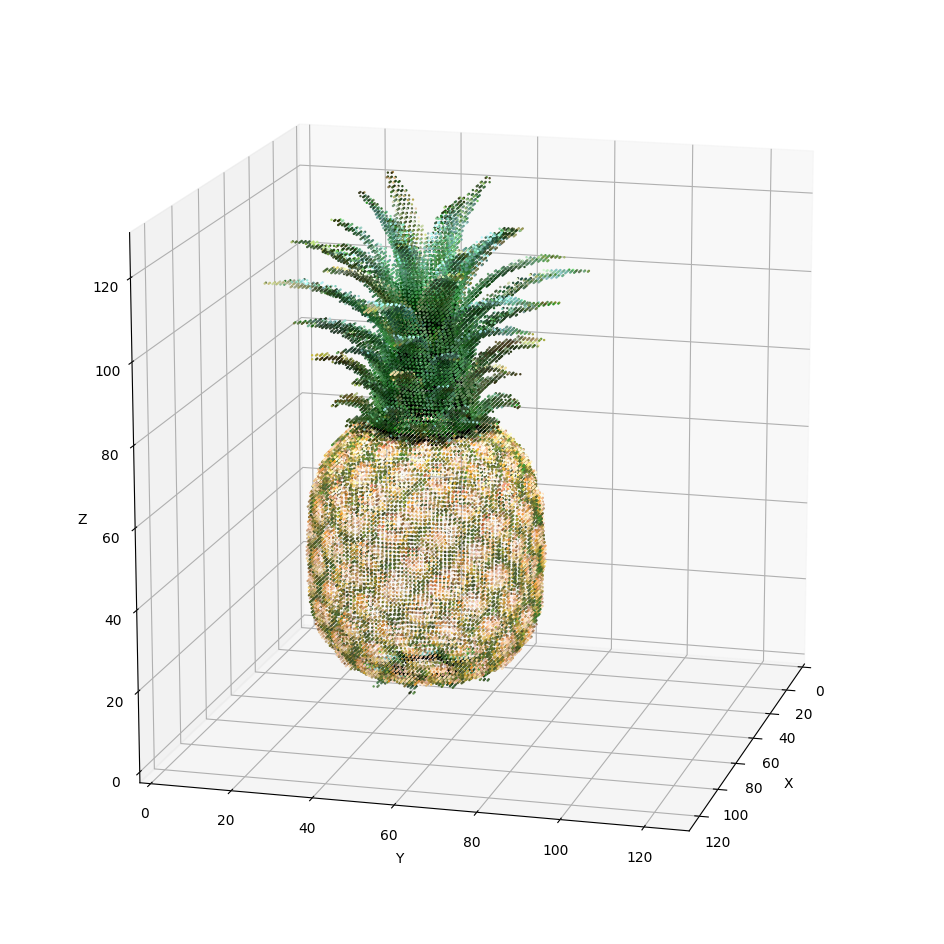

In [2]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

path_vertex_color = np.loadtxt('path_vertex_color.txt')
colors_seikika = path_vertex_color[:, 3:6]/255

# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(path_vertex_color[:,0], path_vertex_color[:,1], path_vertex_color[:,2], s = 0.5, c = colors_seikika, alpha = 1)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")

plt.show()

In [3]:
#座標の差分を取得
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


vertex_before = path_vertex_color[0:path_vertex_color.shape[0]-1,0:3]
vertex_after = path_vertex_color[1:path_vertex_color.shape[0],0:3]
diff = vertex_after - vertex_before
print(diff)


#DCT 乗算ができるので、ちょっと精度をあげましたってことで、DCTを改善する
#今のDCTの論文をもう一度確認する


[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [-1. -1.  1.]
 ...
 [ 1.  2.  0.]
 [ 1.  8.  9.]
 [ 1.  0.  0.]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(threshold=np.inf)


code_vertex = np.empty((diff.shape[0]), dtype=np.int32)

diff = diff.astype(np.int32)

for i in range(diff.shape[0]):
    if np.array_equal(diff[i], [-1, -1, -1]):
        code_vertex[i] = 16
    elif np.array_equal(diff[i], [-1, -1, 0]):
        code_vertex[i] = 17
    elif np.array_equal(diff[i], [-1, -1, 1]):
        code_vertex[i] = 18
    elif np.array_equal(diff[i], [-1, 0, -1]):
        code_vertex[i] = 19
    elif np.array_equal(diff[i], [-1, 0, 0]):
        code_vertex[i] = 20
    elif np.array_equal(diff[i], [-1, 0, 1]):
        code_vertex[i] = 21
    elif np.array_equal(diff[i], [-1, 1, -1]):
        code_vertex[i] = 22
    elif np.array_equal(diff[i], [-1, 1, 0]):
        code_vertex[i] = 23
    elif np.array_equal(diff[i], [0, -1, -1]):
        code_vertex[i] = 0
    elif np.array_equal(diff[i], [0, -1, 0]):
        code_vertex[i] = 1
    elif np.array_equal(diff[i], [0, -1, 1]):
        code_vertex[i] = 2
    elif np.array_equal(diff[i], [0, 0, -1]):
        code_vertex[i] = 3
    elif np.array_equal(diff[i], [0, 0, 1]):
        code_vertex[i] = 4
    elif np.array_equal(diff[i], [0, 1, -1]):
        code_vertex[i] = 5
    elif np.array_equal(diff[i], [0, 1, 0]):
        code_vertex[i] = 6
    elif np.array_equal(diff[i], [0, 1, 1]):
        code_vertex[i] = 7
    elif np.array_equal(diff[i], [1, -1, -1]):
        code_vertex[i] = 8
    elif np.array_equal(diff[i], [1, -1, 0]):
        code_vertex[i] = 9
    elif np.array_equal(diff[i], [1, -1, 1]):
        code_vertex[i] = 10
    elif np.array_equal(diff[i], [1, 0, -1]):
        code_vertex[i] = 11
    elif np.array_equal(diff[i], [1, 0, 0]):
        code_vertex[i] = 12
    elif np.array_equal(diff[i], [1, 0, 1]):
        code_vertex[i] = 13
    elif np.array_equal(diff[i], [1, 1, -1]):
        code_vertex[i] = 14
    elif np.array_equal(diff[i], [1, 1, 0]):
        code_vertex[i] = 15
    elif np.array_equal(diff[i], [-1, 1, 1]):
        code_vertex[i] = 24 
    elif np.array_equal(diff[i], [1, 1, 1]):
        code_vertex[i] = 25
    else: 
        code_vertex[i] = 26
        code_vertex = np.insert(code_vertex, i+1, vertex_after[i])

code_vertex = np.insert(code_vertex, 0, vertex_before[0]) 
code_vertex = np.insert(code_vertex, code_vertex.shape, 27) 
code_vertex = np.insert(code_vertex, 0, 31) 
print(code_vertex)
print(code_vertex.shape)


[         31          44          49           2           6           6
          18          25          23          20          17          20
          23           6          20          17           3           2
          15          23           6          15          24           5
           7           6          12          25          15           8
           8          15          25           1           1          12
          15           7          14          25          17           1
          15          15          12          25          24           7
          23          12          21           7          16          17
          23          21           7          24           6           8
          25           7          16          21           7          21
          16           3          18          20          15           0
           8           7           3           0          11          16
           8           8          16          16   

In [5]:
import numpy as np
np.set_printoptions(threshold=np.inf)
# 命令をバイナリ列に変換
# 座標送信時とDIFF送信時で、7ビット5ビットでビット数が変わる

to_binary_7bit = np.vectorize(lambda x: np.binary_repr(x, width=7))
to_binary_5bit = np.vectorize(lambda x: np.binary_repr(x, width=5))

binary_arr = np.copy(code_vertex)

def convert_to_binary(code_vertex):
    k = 0
    binary_arr = to_binary_7bit(code_vertex)
    while(k < code_vertex.shape[0]):
        if (code_vertex[k] == 28 or k == 0):
            binary_arr[k] = to_binary_5bit(code_vertex[k])
            k += 4
        else:
            binary_arr[k] = to_binary_5bit(code_vertex[k])
            k += 1
    print(binary_arr)

    # 各要素の2進数表現を連結して1つの配列にする
    code_vertex_binary = np.array([int(digit) for binary in binary_arr for digit in binary])
    
    return code_vertex_binary

# 2進数に変換して結果を取得
code_vertex_binary_pre = convert_to_binary(code_vertex)

# 結果の出力
print(code_vertex_binary_pre)

# 2進数を10進数に変換する関数
def binary_to_decimal(binary_array):
    decimal = 0
    power = len(binary_array) - 1
    for bit in binary_array:
        decimal += bit * (2 ** power)
        power -= 1
    return decimal


C:\Users\ku-admin\AppData\Local\Temp\ipykernel_11852\2587876986.py:6: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  to_binary_7bit = np.vectorize(lambda x: np.binary_repr(x, width=7))
C:\Users\ku-admin\AppData\Local\Temp\ipykernel_11852\2587876986.py:7: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  to_binary_5bit = np.vectorize(lambda x: np.binary_repr(x, width=5))


['11111' '0101100' '0110001' '0000010' '00110' '00110' '10010' '11001'
 '10111' '10100' '10001' '10100' '10111' '00110' '10100' '10001' '00011'
 '00010' '01111' '10111' '00110' '01111' '11000' '00101' '00111' '00110'
 '01100' '11001' '01111' '01000' '01000' '01111' '11001' '00001' '00001'
 '01100' '01111' '00111' '01110' '11001' '10001' '00001' '01111' '01111'
 '01100' '11001' '11000' '00111' '10111' '01100' '10101' '00111' '10000'
 '10001' '10111' '10101' '00111' '11000' '00110' '01000' '11001' '00111'
 '10000' '10101' '00111' '10101' '10000' '00011' '10010' '10100' '01111'
 '00000' '01000' '00111' '00011' '00000' '01011' '10000' '01000' '01000'
 '10000' '10000' '10001' '00110' '11000' '10100' '10001' '01001' '00000'
 '01111' '00111' '00011' '10101' '10101' '11000' '10011' '10010' '10111'
 '11001' '10010' '00110' '11001' '01111' '01101' '01011' '01111' '01100'
 '10101' '00111' '11001' '10101' '00100' '10101' '10100' '00111' '01100'
 '01011' '11001' '01101' '01100' '00011' '01000' '011

In [8]:
#座標受信
np.set_printoptions(threshold=np.inf)
#ID(300番目(なので299が出てくるはず))
ID = np.array([72,55,29])

code_XYZ = np.zeros((3,))

zyushin = 0
k = 0
num = 100000

code_vertex_binary = np.copy(code_vertex_binary_pre)

while zyushin == 0:
    code_zyushin = code_vertex_binary[0:5]
    if np.array_equal(code_zyushin, [1,1,1,1,1]):
        code_vertex_binary = np.delete(code_vertex_binary, slice(0,5))
    zyushin = 1

for j in range(3):
    code_zyushin = code_vertex_binary[0:7]
    #print(code_zyushin)
    for i in range(len(code_zyushin)):
        code_XYZ[j] += code_zyushin[i] * 2**(len(code_zyushin)-1-i)
    code_vertex_binary = np.delete(code_vertex_binary, slice(0,7))
    if np.array_equal(ID, code_XYZ):
        num = k
#k += 1

while(len(code_vertex_binary) > 0):
    code_zyushin = code_vertex_binary[0:5]
    code_vertex_binary = np.delete(code_vertex_binary, slice(0,5))
    if np.array_equal(code_zyushin[0:2], [1,1]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [-1,1,1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [1,1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            for j in range(3):
                code_zyushin = code_vertex_binary[0:7]
                code_vertex_binary = np.delete(code_vertex_binary, slice(0,7))
                code_XYZ[j] = 0
                for i in range(len(code_zyushin)):
                    code_XYZ[j] += code_zyushin[i] * 2**(len(code_zyushin)-1-i)
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            zyushin = 2
            break #このときはkは増えない

    elif np.array_equal(code_zyushin[0:2], [1,0]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [-1,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [-1,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [-1,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [-1,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [-1,0,0]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [-1,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [-1,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [-1,1,0]

    elif np.array_equal(code_zyushin[0:2], [0,0]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [0,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [0,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [0,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [0,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [0,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [0,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [0,1,0]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [0,1,1]

    elif np.array_equal(code_zyushin[0:2], [0,1]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [1,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [1,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [1,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [1,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [1,0,0]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [1,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [1,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [1,1,0]

    k += 1
    if np.array_equal(code_XYZ, ID):
        num = k #1座標ごとに1kが増える

#何番目の発光デバイスか
print(num)
print(zyushin)

299
2


In [29]:
#量子化テーブルの作成
import numpy as np

bairitu = 3
dc = 50

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableY = (ryoshi_Y*bairitu).astype(np.int32)
tableY[tableY < 1] = 1
print(tableY)

tableC = np.zeros((8,8))
ryoshi_C = np.array([[dc,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])


tableC = (ryoshi_C*bairitu).astype(np.int32)
tableC[tableC<1] =1
print(tableC)

[[150  33  30  48  72 120 153 183]
 [ 36  36  42  57  78 174 180 165]
 [ 42  39  48  72 120 171 207 168]
 [ 42  51  66  87 153 261 240 186]
 [ 54  66 111 168 204 327 309 231]
 [ 72 105 165 192 243 312 339 276]
 [147 192 234 261 309 363 360 303]
 [216 276 285 294 336 300 309 297]]
[[150  54  72 141 297 297 297 297]
 [ 54  63  78 198 297 297 297 297]
 [ 72  78 168 297 297 297 297 297]
 [141 198 297 297 297 297 297 297]
 [297 297 297 297 297 297 297 297]
 [297 297 297 297 297 297 297 297]
 [297 297 297 297 297 297 297 297]
 [297 297 297 297 297 297 297 297]]


In [88]:
#DCT
import numpy as np

def proposed_stage_1(x):
    X = np.zeros((8,))
    X[0] = x[0] + x[7]
    X[1] = x[1] + x[6]
    X[2] = x[2] + x[5]
    X[3] = x[3] + x[4]
    X[4] = x[3] - x[4]
    X[5] = x[2] - x[5]
    X[6] = x[1] - x[6]
    X[7] = x[0] - x[7]
    return X

def proposed_stage_2(x):
    X = np.copy(x)
    X[0] = x[0] + x[3]
    X[1] = x[1] + x[2]
    X[2] = x[1] - x[2]
    X[3] = x[0] - x[3]
    return X

def proposed_stage_3(x):
    X = np.copy(x)
    X[0] = x[0] + x[1]
    X[4] = x[0] - x[1]
    X[6] = -x[2]
    X[2] = x[3]
    X[5] = x[4]
    X[7] = x[5]
    X[1] = x[6]
    X[3] = x[7]
    return X

def proposed_stage_1_inverse(X):
    x = np.zeros((8,))
    x[0] = (0.5 * (X[0] + X[7])).astype(np.int32)
    x[1] = (0.5 * (X[1] + X[6])).astype(np.int32)
    x[2] = (0.5 * (X[2] + X[5])).astype(np.int32)
    x[3] = (0.5 * (X[3] + X[4])).astype(np.int32)
    x[4] = (0.5 * (X[3] - X[4])).astype(np.int32)
    x[5] = (0.5 * (X[2] - X[5])).astype(np.int32)
    x[6] = (0.5 * (X[1] - X[6])).astype(np.int32)
    x[7] = (0.5 * (X[0] - X[7])).astype(np.int32)
    return x

def proposed_stage_2_inverse(X):
    x = np.copy(X)
    x[0] = (0.5 * (X[0] + X[3])).astype(np.int32)
    x[1] = (0.5 * (X[1] + X[2])).astype(np.int32)
    x[2] = (0.5 * (X[1] - X[2])).astype(np.int32)
    x[3] = (0.5 * (X[0] - X[3])).astype(np.int32)
    return x

def proposed_stage_3_inverse(X):
    x = np.copy(X)
    x[0] = (0.5 * (X[0] + X[4])).astype(np.int32)
    x[1] = (0.5 * (X[0] - X[4])).astype(np.int32)
    x[2] = -X[6]
    x[3] = X[2]
    x[4] = X[5]
    x[5] = X[7]
    x[6] = X[1]
    x[7] = X[3]
    return x

def DCT1(x):
    X_1 = proposed_stage_1(x)
    X_2 = proposed_stage_2(X_1)
    X_3 = proposed_stage_3(X_2)
    return X_3

def IDCT1(X_3):
    X_2 = proposed_stage_3_inverse(X_3)
    X_1 = proposed_stage_2_inverse(X_2)
    x = proposed_stage_1_inverse(X_1)
    return x

def tenchi2D(x):
    x = np.transpose(x)
    return x

def DCT_2D(x):
    X_out1 = np.zeros((8,8))
    X_out2 = np.zeros((8,8))
    for i in range(8):
        X_out1[i] = DCT1(x[i])
    X_out1 = tenchi2D(X_out1)
    for i in range(8):
        X_out2[i] = DCT1(X_out1[i])
    return X_out2
    
def IDCT_2D(X_out2):
    X_out1 = np.zeros((8,8))
    x = np.zeros((8,8))
    for i in range(8):
        X_out1[i] = IDCT1(X_out2[i])
    #転置
    X_out1 = tenchi2D(X_out1)
    # ｘ方向
    for i in range(8):
        x[i] = IDCT1(X_out1[i])
    return x

In [91]:
#色情報の送信
#バイナリ変換用
to_binary_3bit = np.vectorize(lambda x: np.binary_repr(x, width=3))
to_binary_6bit = np.vectorize(lambda x: np.binary_repr(x, width=6))
to_binary_8bit = np.vectorize(lambda x: np.binary_repr(x, width=8))

#順番で並べた色情報
color_soushin = path_vertex_color[:,3:6]
# print(color_soushin)
# print(color_soushin.shape)

#枚数を計算
num_vertex = color_soushin.shape[0]
maisu = num_vertex//64 + 1
print(maisu)

#最後の枚数の足りていない部分を最後の色の値で埋める
anaume_kosu = (maisu*64)-num_vertex
anaume_atai = color_soushin[num_vertex-1]
anaume = np.ones((anaume_kosu,3))*anaume_atai
color_soushin = np.concatenate([color_soushin, anaume], 0)

#枚ごとのDCTを入れる配列
DCT_package = np.zeros((maisu,8,8,3))

#maisu枚に
for i in range(maisu):
    for j in range(8):
        for k in range(8):
            DCT_package[i,j,k] = color_soushin[64*i + 8*j + k]

#print(DCT_package[maisu-1])

#色ごとに分ける(R, G, B)
R = DCT_package[:,:,:,0]
G = DCT_package[:,:,:,1]
B = DCT_package[:,:,:,2]
print(R[4])

#2D-DCT(RGB)
for i in range(maisu):
    R[i,:,:] = DCT_2D(R[i,:,:])
    G[i,:,:] = DCT_2D(G[i,:,:])
    B[i,:,:] = DCT_2D(B[i,:,:])
    R[i,:,:] = R[i,:,:]/tableY
    G[i,:,:] = G[i,:,:]/tableY
    B[i,:,:] = B[i,:,:]/tableY
    R[i,:,:] = R[i,:,:].astype(np.int32)
    G[i,:,:] = G[i,:,:].astype(np.int32)
    B[i,:,:] = B[i,:,:].astype(np.int32)

code_color_binary_pre = np.array([]).astype(np.int32)
print(R[4])

#R[i]について、非ゼロの要素の要素番号と値を列挙させる
for i in range(maisu):
    R_pera = R[i].astype(np.int32)
    #todo 8,8の要素をいれる、入れた結果の最後の8ビットを消す←いらない、000000であげればよい、あとで改良する
    #直流成分以外を6bitにする
    #R_pera[7,7] = 1
    nonzero_indices = np.nonzero(R_pera)
    values = R_pera[nonzero_indices]
    zahyou_atai = np.column_stack((nonzero_indices[0], nonzero_indices[1], values))
    #直流成分とそれ以外でビット数分ける
    #まず座標と値で分けて、座標は全部3bitでやる
    zahyou = zahyou_atai[:,0:2]
    zahyou = to_binary_3bit(zahyou)
    #値はDC8bit、AC6bit
    atai = zahyou_atai[:,2]
    atai_dc = atai[0]
    atai_ac = atai[1:]
    atai_dc = to_binary_8bit(atai_dc).reshape(1,)
    atai_ac = to_binary_8bit(atai_ac).reshape(zahyou_atai.shape[0]-1,1)
    atai = np.vstack([atai_dc, atai_ac])
    #座標と値くっつける
    zahyou_atai = np.hstack([zahyou, atai])
    print(zahyou_atai)
    #flatten バイナリ列に変換
    result_flattened = zahyou_atai.flatten()
    code_color_binary_pera = np.array([int(digit) for binary in result_flattened for digit in binary])
    ##code_color_binary_pera = code_color_binary_pera[:-6]
    code_color_binary_pre = np.append(code_color_binary_pre, code_color_binary_pera)

#色受信終了の合図
code_color_binary_pre = np.append(code_color_binary_pre, [0,0,0,0,0,0])
print(code_color_binary_pre)

#今はRのみ(Rできたらほかもいけるので確認としてはこれでいいか)

#直流成分とその他成分で与えるビット数を分ける
#直流成分以外は6bitで足りる
#座標は6ビット
#ややこしいので一旦全部8bitでやる
#あとから6bitとかに調節する

#(6bit座標+色)を繰り返す
#(0*0の場所の座標)を受信するたびに枚数をインクリメントして、自分の枚数と一致したら受信し復号する
#↑こうなるように改造する

#復号して表示（これを今週やる)

#maisuごとにDCTして、結果をmaisuごとに保存する
#RGBで復元してどうなるか確認してみる

#ここまで今週やる、これと文献調査

#最後に座標のやつと合わせて、自分の番号＋色を同時に取得できるようにする

564
[[234. 255. 219. 255. 240. 122. 113. 184.]
 [215. 125.  62. 101. 184.  71. 122.  73.]
 [250. 125. 255. 221. 248. 212. 241. 255.]
 [255. 243. 224. 157.  77. 171.  57.  56.]
 [ 67.  60. 196. 149.  59. 218. 152. 108.]
 [152. 117.  64.  54.  60.  68. 159. 184.]
 [ 84.  80. 228. 158. 200. 221. 225. 233.]
 [224. 123.  75. 251. 184. 156.  82.  79.]]
[[ 67. -14.  18.   9.   0.   1.   1.   5.]
 [  0.   4.   2.   1.   7.   1.   0.   0.]
 [  1.   1.  -5.   0.  -3.   0.   1.  -1.]
 [  7.   5.   0.  -1.   2.   0.   0.   0.]
 [  7.   4.   8.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   1.   0.   0.   0.]
 [  1.  -1.  -1.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[['000' '000' '00111110']
 ['000' '001' '11101101']
 ['000' '010' '11111100']
 ['000' '011' '11110010']
 ['000' '100' '00001000']
 ['000' '101' '11111110']
 ['000' '110' '00001001']
 ['000' '111' '11111111']
 ['001' '000' '00000001']
 ['001' '001' '00000100']
 ['001' '010' '00000111']
 ['001' '011' '00000

In [90]:
#復号して表示
#(一旦すべて6bit座標＋8bit値になっている)
np.set_printoptions(threshold=np.inf)

#2進数を10進数に変換
def twos_complement_to_decimal(binary_array):
    # 最上位ビットが0の場合は正の数として普通に変換
    if binary_array[0] == 0:
        return binary_to_decimal(binary_array)
    # 最上位ビットが1の場合、2の補数を取る
    inverted_array = 1 - binary_array  # 各ビットを反転
    inverted_decimal = binary_to_decimal(inverted_array)
    # 1を加えて10進数の負の値を得る
    return -(inverted_decimal + 1)

def binary_to_decimal(binary_array):
    # 2のべき乗を計算
    powers = np.flip(2 ** np.arange(len(binary_array)))
    # 2進数配列と2のべき乗を掛け算し、合計を計算
    decimal = np.sum(binary_array * powers)
    return decimal

#ID(300番目(なので299が出てくるはず))
ID = np.array([72,55,29])

code_XYZ = np.zeros((3,))

code_color_binary = np.copy(code_color_binary_pre)

print(num)
mypage = num//64
print(mypage)

my88 = np.zeros((8,8))

page = -1

color_hozon = np.zeros((8,8))
color_pre = np.zeros((8,8))

#自分のページなら受信したものを保存、そうでなければ受信したものを破棄
#RGBの順番
while(zyushin == 2):
    code_zyushin_color = code_color_binary[0:6]
    code_color_binary = np.delete(code_color_binary, slice(0,6))
    if np.array_equal(code_zyushin_color, [0,0,0,0,0,0]):
        if (mypage == page):
            color_hozon = np.copy(color_pre)
            print(color_hozon)
            break
        color_pre = np.zeros((8,8))
        page += 1
        code_zyushin_color = code_color_binary[0:8]
        code_color_binary = np.delete(code_color_binary, slice(0,8))
        color_pre[0,0] = twos_complement_to_decimal(code_zyushin_color)
        #8座標0,0に8ビットカラー受信
    else:
        #座標+6bitカラー受信
        x_zahyou = binary_to_decimal(code_zyushin_color[0:3])
        y_zahyou = binary_to_decimal(code_zyushin_color[3:6])
        code_zyushin_color = code_color_binary[0:8]
        code_color_binary = np.delete(code_color_binary, slice(0,8))
        color_pre[x_zahyou,y_zahyou] = twos_complement_to_decimal(code_zyushin_color)


#IDCT
color_hozon = color_hozon*tableY

color_hozon = IDCT_2D(color_hozon)

color_hozon[color_hozon>255] = 255
color_hozon[color_hozon<0] = 0

print(color_hozon)



#カラー受信して、自分のIDの色と(path_vertex_colorを使って)比較するところまでが明日のノルマ(テーブルなしで比較すればあってるか分かる)
#もしくは、同じテーブル時の出力をTXTで出力しとく
#高槻から帰った後とかにでもやる
#出来れば論文読むのも少し始めたい
#14日に論文読むか
#ガルパを読むことを基本的に優先する

299
4
[[ 67. -14.  18.   9.   0.   1.   1.   5.]
 [  0.   4.   2.   1.   7.   1.   0.   0.]
 [  1.   1.  -5.   0.  -3.   0.   1.  -1.]
 [  7.   5.   0.  -1.   2.   0.   0.   0.]
 [  7.   4.   8.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   1.   0.   0.   0.]
 [  1.  -1.  -1.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[[225. 226. 167. 255. 239. 167. 109. 194.]
 [213. 132.  72. 130. 151.  72. 128.  87.]
 [228. 184. 208. 209. 230. 208. 252. 229.]
 [168. 207. 198. 140. 101. 198.  73.  93.]
 [153. 105. 183. 125.  86. 183. 145.  78.]
 [156.  69.  93.  53.  74.  93. 137. 157.]
 [100. 102. 210. 165. 186. 210. 242. 229.]
 [214. 143. 113. 224. 185. 113.  83.  96.]]
